In [18]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report

In [19]:
# Load dataset
file_path = "random.csv"  # Sesuaikan dengan path file Anda
df = pd.read_csv(file_path)

In [4]:
# Menggunakan label angka (kolom pertama)
y = df.iloc[:, 0].values

In [22]:
# Menggunakan semua kolom kecuali label sebagai fitur
X = df.iloc[:, 2:].values

In [24]:
# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
# Bagi data menjadi train dan test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [33]:
# Konversi ke format TensorFlow Dataset
def dataframe_to_tf_dataset(features, labels):
    dataset = tf.data.Dataset.from_tensor_slices((features, labels))
    return dataset.batch(256)

dataset_train = dataframe_to_tf_dataset(X_train, y_train)
dataset_test = dataframe_to_tf_dataset(X_test, y_test)

In [34]:
# Definisi model Random Forest dengan TF-DF
model = tfdf.keras.RandomForestModel(task=tfdf.keras.Task.CLASSIFICATION)

Use /tmp/tmpdgxux2lv as temporary training directory


In [35]:
# Latih model
model.fit(x=dataset_train)

Reading training dataset...
Training dataset read in 0:00:00.240067. Found 66824 examples.
Training model...


I0000 00:00:1739098225.140822  105253 kernel.cc:782] Start Yggdrasil model training
I0000 00:00:1739098225.140853  105253 kernel.cc:783] Collect training examples
I0000 00:00:1739098225.140863  105253 kernel.cc:795] Dataspec guide:
column_guides {
  column_name_pattern: "^__LABEL$"
  type: CATEGORICAL
  categorial {
    min_vocab_frequency: 0
    max_vocab_count: -1
  }
}
default_column_guide {
  categorial {
    max_vocab_count: 2000
  }
  discretized_numerical {
    maximum_num_bins: 255
  }
}
ignore_columns_without_guides: false
detect_numerical_as_discretized_numerical: false

I0000 00:00:1739098225.140936  105253 kernel.cc:401] Number of batches: 262
I0000 00:00:1739098225.140942  105253 kernel.cc:402] Number of examples: 66824
I0000 00:00:1739098225.144575  105253 kernel.cc:802] Training dataset:
Number of records: 66824
Number of columns: 10

Number of columns by type:
	NUMERICAL: 9 (90%)
	CATEGORICAL: 1 (10%)

Columns:

NUMERICAL: 9 (90%)
	1: "data:0.0" NUMERICAL mean:0.0005116

Model trained in 0:00:08.464758
Compiling model...


I0000 00:00:1739098233.452139  105253 decision_forest.cc:761] Model loaded with 300 root(s), 1141642 node(s), and 9 input feature(s).
I0000 00:00:1739098233.452178  105253 abstract_model.cc:1404] Engine "RandomForestGeneric" built
2025-02-09 18:50:33.452192: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


Model compiled.


In [59]:
# Simpan model
import joblib
model.save("random_forest_model")
joblib.dump(model, 'random_forest_model.pkl')
joblib.dump(scaler, "scaler.pkl")

INFO:tensorflow:Assets written to: random_forest_model/assets


INFO:tensorflow:Assets written to: random_forest_model/assets


['scaler.pkl']

In [47]:
# Evaluasi model
evaluation = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {evaluation:.4f}")

523/523 [==============================] - 3s 6ms/step - loss: 0.0000e+00
Test Accuracy: 0.0000


In [48]:
# Prediksi pada data uji
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

523/523 [==============================] - 3s 6ms/step


In [51]:
y_pred_classes

array([1, 1, 1, ..., 4, 6, 0])

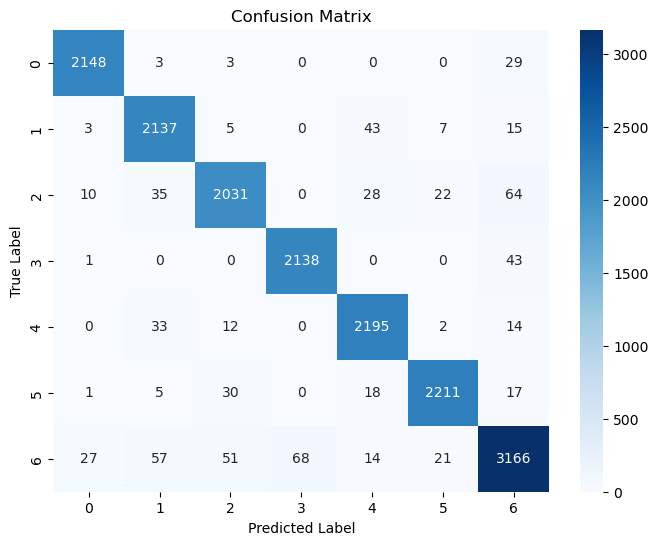

In [49]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [15]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2183
           1       0.94      0.97      0.95      2210
           2       0.95      0.93      0.94      2190
           3       0.97      0.98      0.97      2182
           4       0.96      0.97      0.96      2256
           5       0.98      0.97      0.97      2282
           6       0.95      0.93      0.94      3404

    accuracy                           0.96     16707
   macro avg       0.96      0.96      0.96     16707
weighted avg       0.96      0.96      0.96     16707



In [85]:
# Memuat model kembali (contoh penggunaan di sesi lain)
from tensorflow import keras
loaded_model = keras.layers.TFSMLayer('random_forest_model', call_endpoint="serving_default")

2025-02-09 19:18:45.848794: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1206] Loading model from path random_forest_model/assets/ with prefix 951927cc99aa4ac7
I0000 00:00:1739099928.993034  107850 decision_forest.cc:761] Model loaded with 300 root(s), 1141642 node(s), and 9 input feature(s).
I0000 00:00:1739099928.993071  107850 abstract_model.cc:1404] Engine "RandomForestGeneric" built
2025-02-09 19:18:48.993087: I tensorflow_decision_forests/tensorflow/ops/inference/kernel.cc:1035] Use fast generic engine


In [86]:
# Prediksi dengan model yang dimuat ulang
y_new_pred = loaded_model(X_test)
output_key = list(y_new_pred.keys())[0]  # Automatically get the first key
y_new_pred = y_new_pred[output_key]  # Extract the actual predictions
y_new_pred_classes = np.argmax(y_new_pred, axis=1)

print("Predicted Classes:", y_new_pred_classes)

Predicted Classes: [1 1 1 ... 4 6 0]
